<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/Reto2_Maria_Fernanda_Arroyo_Berrocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargamos las librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para grafico de distribuciones
from scipy.stats import skew, kurtosis #Para caracterizacion de distribucion

from google.colab import drive #Conexion automatica con el drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=30  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='pink')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges=np.histogram(LDA,bins=NC)
  LI=bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo
  freq=counts/np.sum(counts)

  return LI,LS,counts,mc,freq

In [ ]:
# @title 2. Caracterización de la Distribución de Pérdidas
#Variables de Entradas:
def Caractx(e3,e4):

  counts=e3;mc=e4
  u=np.sum(mc*counts)/np.sum(counts) #Valor esperado
  varianza=np.sum(counts*(mc-u)**2)/np.sum(counts) #que tan lejos estan los datos de la media
  desviacion=np.sqrt(varianza)

  #Quiero identificar datos raros o outliers
  LIe= u-2*desviacion;LSe=u+2*desviacion
  filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]

  #Coeficiente de asimetría
  cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
  vcas=(skew(LDA)-cas)/skew(LDA)

  #Coeficiente de curtosis
  curt=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3

  return u,varianza,desviacion,cas,curt,filas_out

In [ ]:
# @title 3. Caracterizacón de las Pérdidas de la Distribución Agregada
#Variables de entrada: Media de la LDA
#Variables de salida: Pérdidas Esperadas, OpVar, Pérdidas Catastróficas,
#Pérdidas No Esperadas

def Perdx(e5):
  u=e5
  PE=len(np.where(LDA<u)[0])
  OpVar=np.percentile(LDA,99.9)
  PC=len(np.where(LDA>OpVar)[0])
  PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])

  return PE,OpVar,PC,PNE

4. Cargamos los datos de trabajo

Año 1
Hoja 5


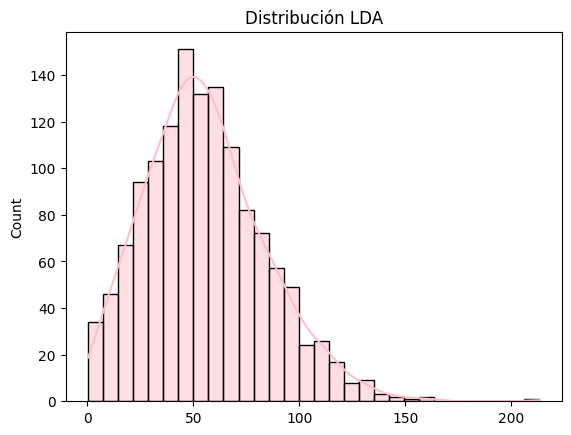

,LI,LS,mc,ND,freq
0,0.413092,7.507148,3.960120,34,0.025335
1,7.507148,14.601204,11.054176,46,0.034277
2,14.601204,21.695260,18.148232,67,0.049925
3,21.695260,28.789316,25.242288,94,0.070045
4,28.789316,35.883372,32.336344,103,0.076751
5,35.883372,42.977428,39.430400,118,0.087928
6,42.977428,50.071485,46.524456,151,0.112519
7,50.071485,57.165541,53.618513,132,0.098361
8,57.165541,64.259597,60.712569,135,0.100596
9,64.259597,71.353653,67.806625,109,0.081222


Año 2
Hoja 4


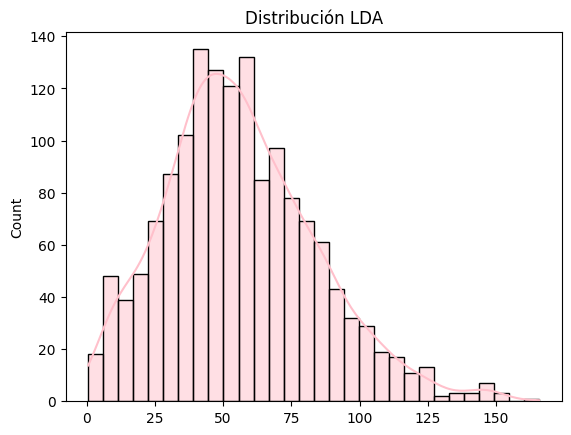

,LI,LS,mc,ND,freq
0,0.568346,6.075979,3.322162,18,0.012000
1,6.075979,11.583612,8.829796,48,0.032000
2,11.583612,17.091246,14.337429,39,0.026000
3,17.091246,22.598879,19.845062,49,0.032667
4,22.598879,28.106512,25.352695,69,0.046000
5,28.106512,33.614145,30.860329,87,0.058000
6,33.614145,39.121778,36.367962,102,0.068000
7,39.121778,44.629412,41.875595,135,0.090000
8,44.629412,50.137045,47.383228,127,0.084667
9,50.137045,55.644678,52.890862,121,0.080667


Año 3
Hoja 3


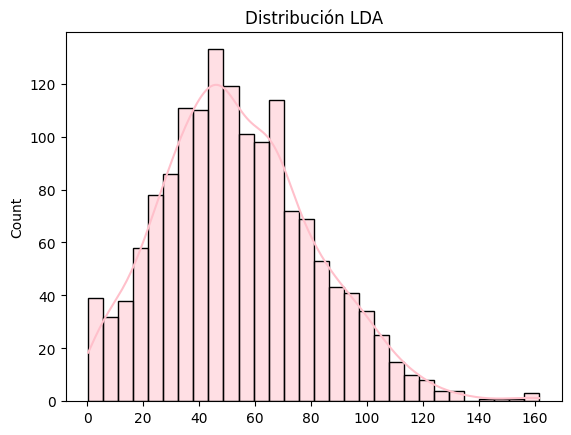

,LI,LS,mc,ND,freq
0,0.427835,5.800266,3.114050,39,0.025983
1,5.800266,11.172697,8.486481,32,0.021319
2,11.172697,16.545128,13.858913,38,0.025316
3,16.545128,21.917559,19.231344,58,0.038641
4,21.917559,27.289991,24.603775,78,0.051965
5,27.289991,32.662422,29.976206,86,0.057295
6,32.662422,38.034853,35.348638,111,0.073951
7,38.034853,43.407284,40.721069,110,0.073284
8,43.407284,48.779716,46.093500,133,0.088608
9,48.779716,54.152147,51.465931,119,0.079280


Año 4
Hoja 2


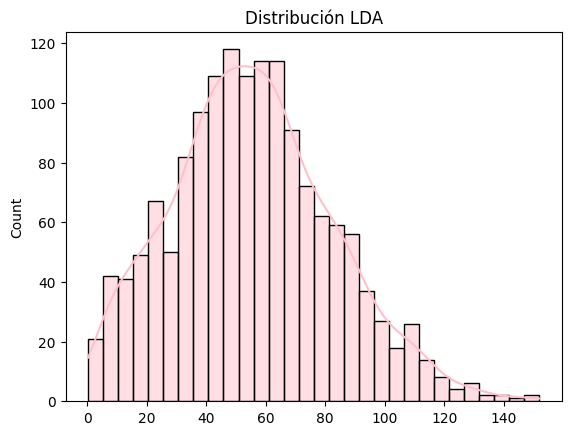

,LI,LS,mc,ND,freq
0,0.354255,5.403708,2.878982,21,0.014000
1,5.403708,10.453162,7.928435,42,0.028000
2,10.453162,15.502616,12.977889,41,0.027333
3,15.502616,20.552070,18.027343,49,0.032667
4,20.552070,25.601524,23.076797,67,0.044667
5,25.601524,30.650978,28.126251,50,0.033333
6,30.650978,35.700432,33.175705,82,0.054667
7,35.700432,40.749886,38.225159,97,0.064667
8,40.749886,45.799339,43.274613,109,0.072667
9,45.799339,50.848793,48.324066,118,0.078667


In [ ]:
nxl="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
m1=0
for k in range(5,1,-1):
  m1=m1+1
  print("Año",m1)
  print("Hoja",k)
  XDB = pd.read_excel(nxl,sheet_name=k)
  LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
  XDB["LDA"]=LDA
  #display(XDB)

  #Mostrar la tabla con los resultados de la caracterización LDA
  LI, LS, counts, mc, freq=Histx(LDA)
  df=pd.DataFrame({'LI':LI,'LS':LS,'mc':mc,"ND":counts,'freq':freq})
  display(df)
  df.to_excel("Histograma_LDA.xlsx")

5. Realizamos el muestreo con Monte Carlo

In [ ]:
# para guardar los resultados de todos los años
comparaciones = []

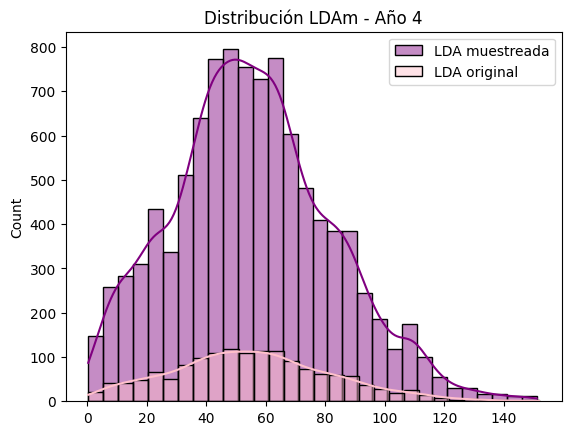


===== Año 4 =====

Información LDA original
La media es: 55.52792809830674
La varianza es: 723.4279394056007
El coeficiente de asimetría es: 0.33577677798555927
El coeficiente de curtosis es: -0.05905381850989677

Información LDA muestreada
La media es: 55.48071378580985
La varianza es: 719.4661891554373
El coeficiente de asimetría es: 0.33409889641535756
El coeficiente de curtosis es: -0.051482251211378394

las diferencias entre las métricas son
La diferencia porcentual de la media es: -0.08502804645133273
La diferencia porcentual de la varianza es: -0.5476357815843461
La diferencia porcentual del coeficiente de asimetría es: -0.4997014922437167
La diferencia porcentual del coeficiente de curtosis es: -12.821469448668193


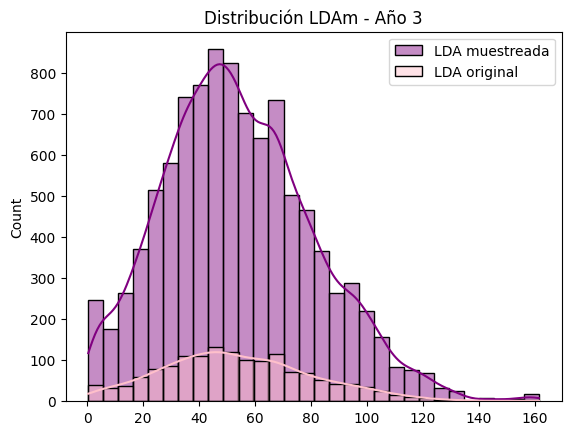


===== Año 3 =====

Información LDA original
La media es: 54.14913274996507
La varianza es: 741.7047492329867
El coeficiente de asimetría es: 0.4626527394052709
El coeficiente de curtosis es: 0.19323398429994487

Información LDA muestreada
La media es: 54.33518831871103
La varianza es: 729.5545429970339
El coeficiente de asimetría es: 0.4502314879954743
El coeficiente de curtosis es: 0.13115409657413668

las diferencias entre las métricas son
La diferencia porcentual de la media es: 0.3435984277071986
La diferencia porcentual de la varianza es: -1.6381459399468112
La diferencia porcentual del coeficiente de asimetría es: -2.6847893358988495
La diferencia porcentual del coeficiente de curtosis es: -32.12679588981901


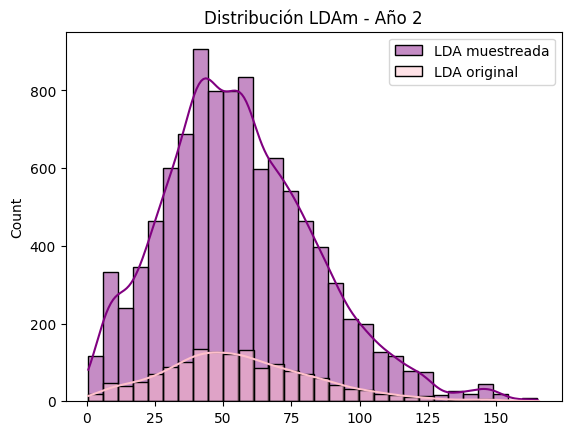


===== Año 2 =====

Información LDA original
La media es: 56.30885418289803
La varianza es: 771.2403140774801
El coeficiente de asimetría es: 0.5659880771238841
El coeficiente de curtosis es: 0.3802458844063801

Información LDA muestreada
La media es: 56.11747079196911
La varianza es: 779.0189779235188
El coeficiente de asimetría es: 0.554772007608036
El coeficiente de curtosis es: 0.3330484543531682

las diferencias entre las métricas son
La diferencia porcentual de la media es: -0.3398815225528883
La diferencia porcentual de la varianza es: 1.0085914473160282
La diferencia porcentual del coeficiente de asimetría es: -1.981679468027574
La diferencia porcentual del coeficiente de curtosis es: -12.41234474553065


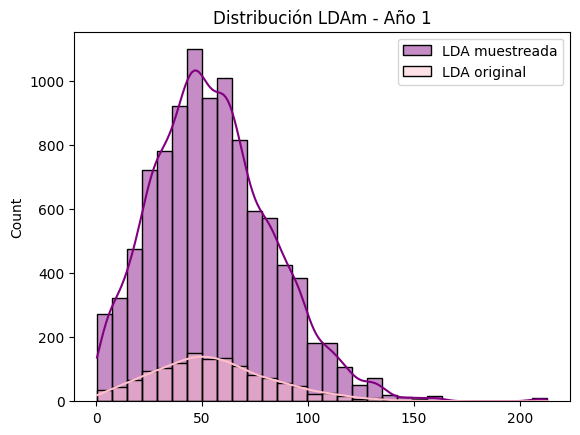


===== Año 1 =====

Información LDA original
La media es: 55.53415928136799
La varianza es: 808.8474818320537
El coeficiente de asimetría es: 0.6081280380514263
El coeficiente de curtosis es: 0.7009652261191679

Información LDA muestreada
La media es: 55.41811068056643
La varianza es: 805.909904931191
El coeficiente de asimetría es: 0.6129985948776829
El coeficiente de curtosis es: 0.8586776422415938

las diferencias entre las métricas son
La diferencia porcentual de la media es: -0.20896796188737363
La diferencia porcentual de la varianza es: -0.36318057073121623
La diferencia porcentual del coeficiente de asimetría es: 0.8009097626649324
La diferencia porcentual del coeficiente de curtosis es: 22.49932097139637


In [ ]:
seleccion = [(2, "Año 4"), (3, "Año 3"), (4, "Año 2"), (5, "Año 1")]
NC = 30
Confiabilidad = 9999 + 1  # 99.99%

for idx, etiqueta in seleccion:
    XDB = pd.read_excel(nxl, sheet_name=idx)
    LDA = (XDB.iloc[:,25] * XDB.iloc[:,33] * (1 + XDB.iloc[:,35])).to_numpy().ravel()

    counts, edges = np.histogram(LDA, bins=NC)
    LI, LS = edges[:-1], edges[1:]
    freq = counts / counts.sum()
    acum = np.cumsum(freq)

    # Realizamos el método Monte Carlo
    LDAm = np.empty(Confiabilidad)
    for k in range(Confiabilidad):
        al = np.random.uniform(0, 1)
        inter = np.searchsorted(acum, al, side='left')
        if inter >= len(LI):
            inter = len(LI) - 1
        LDAm[k] = np.random.uniform(LI[inter], LS[inter])

    plt.figure()
    sns.histplot(LDAm, kde=True, bins=NC, color='purple', label='LDA muestreada', alpha=0.45)
    sns.histplot(LDA,  kde=True, bins=NC, color='pink',   label='LDA original',  alpha=0.45)
    plt.title(f'Distribución LDAm - {etiqueta}')
    plt.legend()
    plt.show()

    LDA_o  = np.asarray(LDA).ravel()
    LDA_mc = np.asarray(LDAm).ravel()

    print(f"\n===== {etiqueta} =====")  # usa tu variable de año

    print("\nInformación LDA original")
    print('La media es:', np.mean(LDA_o))
    print('La varianza es:', np.var(LDA_o))
    print('El coeficiente de asimetría es:', skew(LDA_o, bias=False))
    print('El coeficiente de curtosis es:', kurtosis(LDA_o, bias=False))

    print("\nInformación LDA muestreada")
    print('La media es:', np.mean(LDA_mc))
    print('La varianza es:', np.var(LDA_mc))
    print('El coeficiente de asimetría es:', skew(LDA_mc, bias=False))
    print('El coeficiente de curtosis es:', kurtosis(LDA_mc, bias=False))

    def pct(nuevo, base):
        return np.nan if (base == 0 or not np.isfinite(base)) else (nuevo - base)/base*100.0

    mu_o, mu_m = np.mean(LDA_o), np.mean(LDA_mc)
    va_o, va_m = np.var(LDA_o),  np.var(LDA_mc)
    sk_o, sk_m = skew(LDA_o, bias=False), skew(LDA_mc, bias=False)
    ku_o, ku_m = kurtosis(LDA_o, bias=False), kurtosis(LDA_mc, bias=False)

    dif_u  = pct(mu_m, mu_o)
    dif_v  = pct(va_m, va_o)
    dif_sk = pct(sk_m, sk_o)
    dif_ku = pct(ku_m, ku_o)

    print("\nlas diferencias entre las métricas son")
    print("La diferencia porcentual de la media es:", dif_u)
    print("La diferencia porcentual de la varianza es:", dif_v)
    print("La diferencia porcentual del coeficiente de asimetría es:", dif_sk)
    print("La diferencia porcentual del coeficiente de curtosis es:", dif_ku)

    # Guarda el resultado de ESTE año
    comparaciones.append({
        "Año": etiqueta,      # CAMBIO: usa la etiqueta de esta iteración
        "Media LDA": mu_o,  "Media LDAm": mu_m,  "%Δ media": dif_u,
        "Var LDA": va_o,    "Var LDAm": va_m,    "%Δ var":   dif_v,
        "Skew LDA": sk_o,   "Skew LDAm": sk_m,   "%Δ skew":  dif_sk,
        "Kurt LDA": ku_o,   "Kurt LDAm": ku_m,   "%Δ kurt":  dif_ku
    })

6. Comparamos los resultados

In [ ]:
comparaciones_df = pd.DataFrame(comparaciones)
display(comparaciones_df)

,Año,Media LDA,Media LDAm,%Δ media,Var LDA,Var LDAm,%Δ var,Skew LDA,Skew LDAm,%Δ skew,Kurt LDA,Kurt LDAm,%Δ kurt
0,Año 4,55.527928,55.480714,-0.085028,723.427939,719.466189,-0.547636,0.335777,0.334099,-0.499701,-0.059054,-0.051482,-12.821469
1,Año 3,54.149133,54.335188,0.343598,741.704749,729.554543,-1.638146,0.462653,0.450231,-2.684789,0.193234,0.131154,-32.126796
2,Año 2,56.308854,56.117471,-0.339882,771.240314,779.018978,1.008591,0.565988,0.554772,-1.981679,0.380246,0.333048,-12.412345
3,Año 1,55.534159,55.418111,-0.208968,808.847482,805.909905,-0.363181,0.608128,0.612999,0.800910,0.700965,0.858678,22.499321


**Análisis de Resultados**

Luego de realizar el muestreo de Montecarlo aplicado a la LDA, usando la estructura del histograma de cada año (30 bins y confiabilidad del 99,99%), se comparó la LDA original contra la LDA muestreada para los diferentes años y de acuerdo a los resultados arrojados podemos notar lo siguiente:

- Media: diferencias entre −0,21% y 0,43% lo que confirma que la tendencia central se preserva.

- Varianza: diferencias entre −1,64% y 1,01%, mostrando que la dispersión se mantiene estable.

- Asimetría (skew): diferencias entre −2,69% y 0,80%, coherentes con la forma original.

- Curtosis: baja levemente por el muestreo uniforme dentro de cada bin (suaviza colas).

Gracias a esto, es posible simular la distribución de pérdidas por año sin sesgar el nivel típico ni la dispersión, lo que respalda pérdidas esperadas, provisiones y comparativos. La forma general de la distribución se conserva, así que sirve para escenarios con estabilidad.